### RF Throughput Prediction Model using Drive Test Dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
df = pd.read_csv("D:\AA_Download\Lebara_2024.06.25_11.19.10.csv")

In [3]:
df

,Timestamp,Longitude,Latitude,Speed,Operatorname,Operator,CGI,Cellname,Node,CellID,...,NTech18,NCellName18,NCellid18,NLAC18,NCell18,NARFCN18,NRxLev18,NQual18,NDistance18,NBearing18
0,2024.06.25_11.19.11,-1.513528,52.404637,0,Lebara,23410,2.341010e+14,NaN,501455.0,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024.06.25_11.19.11,-1.513560,52.404679,0,Lebara,23410,2.341010e+14,NaN,501455.0,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024.06.25_11.19.12,-1.513560,52.404679,0,Lebara,23410,2.341010e+14,NaN,501455.0,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024.06.25_11.19.12,-1.513560,52.404679,0,Lebara,23410,2.341010e+14,NaN,501455.0,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024.06.25_11.19.13,-1.513560,52.404679,0,Lebara,23410,2.341010e+14,NaN,501455.0,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5173,2024.06.25_12.43.04,-1.501933,52.406500,3,Lebara,23410,2.341010e+14,NaN,504289.0,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5174,2024.06.25_12.43.05,-1.501933,52.406500,3,Lebara,23410,2.341010e+14,NaN,504289.0,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5175,2024.06.25_12.43.06,-1.501933,52.406500,3,Lebara,23410,2.341010e+14,NaN,504289.0,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5176,2024.06.25_12.43.07,-1.501933,52.406500,3,Lebara,23410,2.341010e+14,NaN,504289.0,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5178, 270)

In [5]:
df.isna().sum()

Timestamp          0
Longitude          0
Latitude           0
Speed              0
Operatorname       0
                ... 
NARFCN18        5178
NRxLev18        5178
NQual18         5178
NDistance18     5178
NBearing18      5178
Length: 270, dtype: int64

In [6]:
df["DL_bitrate"].unique()

array([ 216,  849,   30,   40,   61,   67,   57,   60,   98,   71,   58,
         54,   48,   37,   51,   63,   74,   55,   73,  103,   39,  194,
         52,   64,   42,   70,   45,   84,   91,   93,  184,   97,  110,
         83,  389,   66,   62,   68,   59,  163,   56,  124,   47,   69,
         46,   29,  201,  143,   85,   72,  209,   99,   33,   35,  141,
         81,   92,  156,  276,  404,  307,   65,   34,   50,   32,  104,
         80,  310,   87,   76,   79,  122,   77,  275,   86,   82,  479,
        576,  623,  610,  599,  497,  803, 1830, 2337,  368,  471, 2219,
        357,  387, 1359, 1395, 1271, 1068, 1030,  912,  111,   75,  144,
       2047,  102,   95,  208,   78,  164,  175,  265,  299,  113,  657,
        711, 1147,  554, 1979,  478,  694, 1649, 1509,  932,  895, 1484,
        633, 1520,  939, 1144,  636,  580, 1106, 1217, 1685,  100,  140,
         88,  105,   89,  107,  101,  350,  609,   94,   90, 1930,  294,
         44,  112,  229,   36,  314, 1735,  121,  2

In [7]:
df["UL_bitrate"].unique()

array([ 73, 339,  19,  23,  36,  37,  35,  33,  45,  43,  34,  31,  27,
        22,  29,  66,  39,  42,  40,  46,  32,  68,  24,  41,  26,  38,
        57,  50,  54, 135,  61,  65, 116,  18,  17,  48,  82,  59,  44,
        30,  56,  20, 112,  72,  94,  51,  47,  58,  49, 159, 182,  60,
        70,  99,  87,  67,  64,  62,  77,  71,  55,  86, 105,  76, 204,
       128, 155,  52, 141,  79,  74,  85,  91,  88,  75, 515,  78, 103,
        93,  28,  21,  69, 225,  15,  25,  13,   8,  14,  10,   6,   4,
         3,   2,   1,   0,   5,   7,  11,   9,  16,  12, 245,  53, 133,
       109,  90, 165, 198,  83,  97,  96, 108,  63, 129,  84, 505, 163,
       110, 126,  89, 247, 117,  81, 106, 119, 180, 124, 127, 167, 101,
        80, 160, 222, 170,  95, 131], dtype=int64)

<Axes: xlabel='Longitude', ylabel='Latitude'>

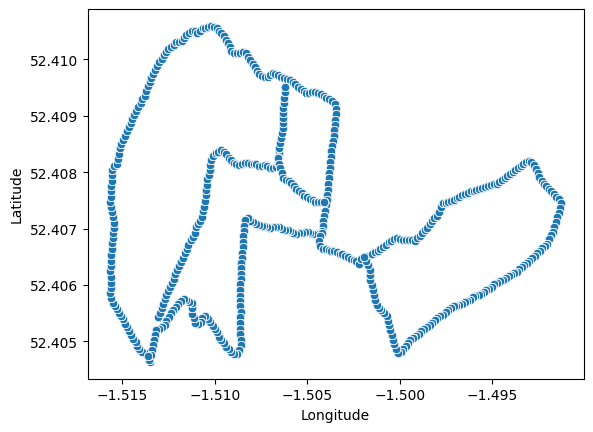

In [8]:
sns.scatterplot(df, x = df["Longitude"], y =df["Latitude"])

In [9]:
# Identify and count NaN entries
nan_count = df.isna().sum()
print("\nCount of NaN entries in each column:")
print(nan_count)


Count of NaN entries in each column:
Timestamp          0
Longitude          0
Latitude           0
Speed              0
Operatorname       0
                ... 
NARFCN18        5178
NRxLev18        5178
NQual18         5178
NDistance18     5178
NBearing18      5178
Length: 270, dtype: int64


In [10]:
df_cleaned = df.dropna(axis=1)

In [11]:
df_cleaned

,Timestamp,Longitude,Latitude,Speed,Operatorname,Operator,CGI,CellID,LAC,NetworkTech,...,DEVICE,NetworkTypeNum,CA,Site_BEARING,BATTERY,CHARGING,FOREGROUND,AVGSPEED,Update_newF,Update_oldF
0,2024.06.25_11.19.11,-1.513528,52.404637,0,Lebara,23410,2.341010e+14,18,8202,4G,...,samsung:SM-A256E:UP1A.231005.007,13,False,1000,96,False,True,0,0,2
1,2024.06.25_11.19.11,-1.513560,52.404679,0,Lebara,23410,2.341010e+14,18,8202,4G,...,samsung:SM-A256E:UP1A.231005.007,13,False,1000,96,False,True,0,0,2
2,2024.06.25_11.19.12,-1.513560,52.404679,0,Lebara,23410,2.341010e+14,18,8202,4G,...,samsung:SM-A256E:UP1A.231005.007,13,False,1000,96,False,True,0,0,3
3,2024.06.25_11.19.12,-1.513560,52.404679,0,Lebara,23410,2.341010e+14,18,8202,4G,...,samsung:SM-A256E:UP1A.231005.007,13,False,1000,96,False,True,0,0,0
4,2024.06.25_11.19.13,-1.513560,52.404679,0,Lebara,23410,2.341010e+14,18,8202,4G,...,samsung:SM-A256E:UP1A.231005.007,13,False,1000,96,False,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5173,2024.06.25_12.43.04,-1.501933,52.406500,3,Lebara,23410,2.341010e+14,35,8202,4G,...,samsung:SM-A256E:UP1A.231005.007,13,False,1000,79,False,True,0,0,0
5174,2024.06.25_12.43.05,-1.501933,52.406500,3,Lebara,23410,2.341010e+14,35,8202,4G,...,samsung:SM-A256E:UP1A.231005.007,13,False,1000,79,False,True,0,0,1
5175,2024.06.25_12.43.06,-1.501933,52.406500,3,Lebara,23410,2.341010e+14,35,8202,4G,...,samsung:SM-A256E:UP1A.231005.007,13,False,1000,79,False,True,0,0,2
5176,2024.06.25_12.43.07,-1.501933,52.406500,3,Lebara,23410,2.341010e+14,35,8202,4G,...,samsung:SM-A256E:UP1A.231005.007,13,False,1000,79,False,True,0,0,3


In [12]:
df = df_cleaned

In [13]:
df.isna().sum()

Timestamp              0
Longitude              0
Latitude               0
Speed                  0
Operatorname           0
Operator               0
CGI                    0
CellID                 0
LAC                    0
NetworkTech            0
NetworkMode            0
Level                  0
Qual                   0
SNR                    0
CQI                    0
LTERSSI                0
ARFCN                  0
DL_bitrate             0
UL_bitrate             0
PSC                    0
Altitude               0
Height                 0
Accuracy               0
Location               0
State                  0
DataConnection_Type    0
DataConnection_Info    0
Layer                  0
Distance               0
Bearing                0
SERVINGTIME            0
CELLHEX                0
LACHEX                 0
RAWCELLID              0
VERSION_NAME           0
VERSION_CODE           0
DEVICE                 0
NetworkTypeNum         0
CA                     0
Site_BEARING           0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5178 entries, 0 to 5177
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            5178 non-null   object 
 1   Longitude            5178 non-null   float64
 2   Latitude             5178 non-null   float64
 3   Speed                5178 non-null   int64  
 4   Operatorname         5178 non-null   object 
 5   Operator             5178 non-null   int64  
 6   CGI                  5178 non-null   float64
 7   CellID               5178 non-null   int64  
 8   LAC                  5178 non-null   int64  
 9   NetworkTech          5178 non-null   object 
 10  NetworkMode          5178 non-null   object 
 11  Level                5178 non-null   int64  
 12  Qual                 5178 non-null   object 
 13  SNR                  5178 non-null   object 
 14  CQI                  5178 non-null   object 
 15  LTERSSI              5178 non-null   o

In [15]:
df["Qual"].unique()

array([-14, -15, -13, -11, -12, -10, -16, -8, -9, -7, -17, -18, -6, -19,
       -20, '-14', '-17', '-16', '-15', '-18', '-13', '-12', '-10', '-11',
       '-9', '-8', '-19', '-20', '-', '4', '-21'], dtype=object)

In [16]:
# Drop rows where Qual, SNR, CQI, and LTERSSI contain "-"
df = df[df["Qual"] != "-"]
df = df[df["SNR"] != "-"]
df = df[df["CQI"] != "-"]
df = df[df["LTERSSI"] != "-"]

# convert to int
df["Qual"] = df["Qual"].astype(int)
df["SNR"] = df["SNR"].astype(int)
df["CQI"] = df["CQI"].astype(int)
df["LTERSSI"] = df["LTERSSI"].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4508 entries, 0 to 5177
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            4508 non-null   object 
 1   Longitude            4508 non-null   float64
 2   Latitude             4508 non-null   float64
 3   Speed                4508 non-null   int64  
 4   Operatorname         4508 non-null   object 
 5   Operator             4508 non-null   int64  
 6   CGI                  4508 non-null   float64
 7   CellID               4508 non-null   int64  
 8   LAC                  4508 non-null   int64  
 9   NetworkTech          4508 non-null   object 
 10  NetworkMode          4508 non-null   object 
 11  Level                4508 non-null   int64  
 12  Qual                 4508 non-null   int32  
 13  SNR                  4508 non-null   int32  
 14  CQI                  4508 non-null   int32  
 15  LTERSSI              4508 non-null   int32 

<Figure size 768x576 with 0 Axes>

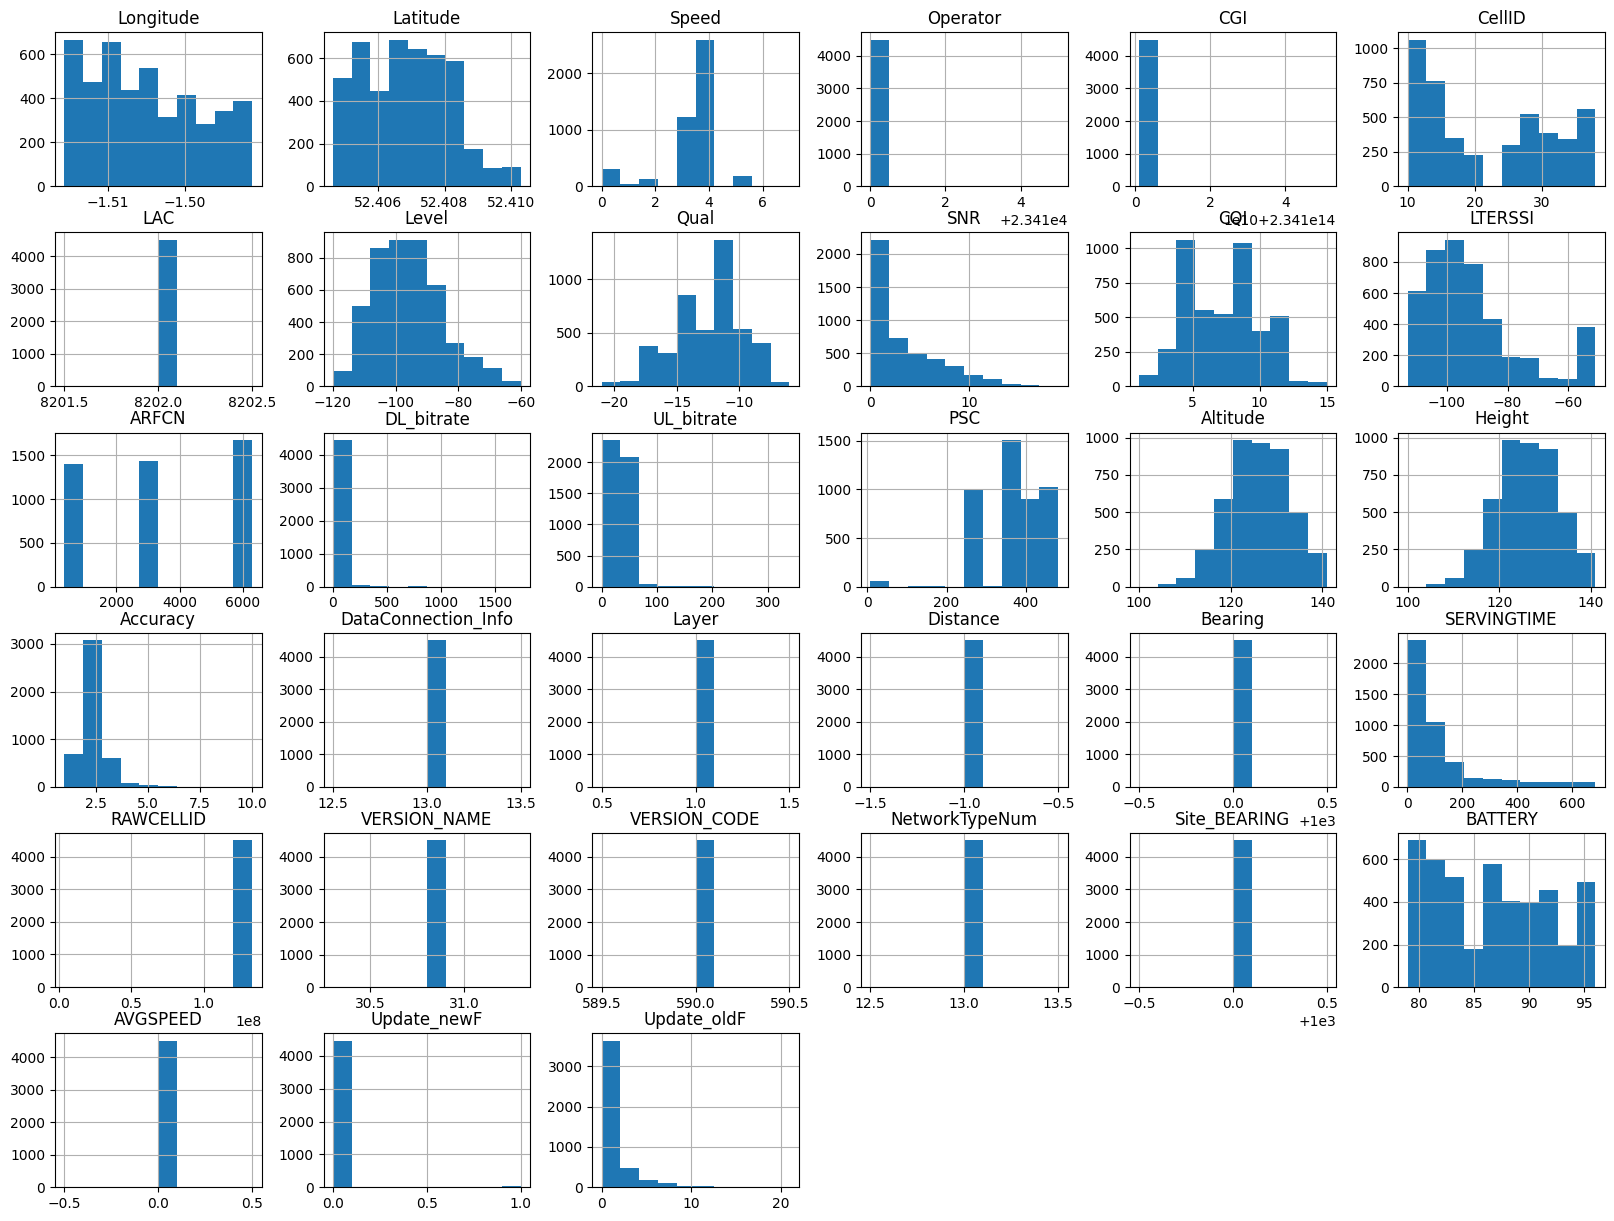

In [18]:
# Visualization of the dataset for a brief insight

plt.figure(dpi=120)
df.hist(figsize=(20,15))
plt.show()

In [19]:
df.duplicated().sum()

6

In [20]:
df = df.drop_duplicates()

In [21]:
df.duplicated().sum()

0

In [22]:
# Select only numerical columns
df_num = df.select_dtypes(include=[int, float])

In [23]:
df_num

,Longitude,Latitude,Speed,Operator,CGI,CellID,LAC,Level,Qual,SNR,...,SERVINGTIME,RAWCELLID,VERSION_NAME,VERSION_CODE,NetworkTypeNum,Site_BEARING,BATTERY,AVGSPEED,Update_newF,Update_oldF
0,-1.513528,52.404637,0,23410,2.341010e+14,18,8202,-88,-14,4,...,300,128372498.0,30.8,590,13,1000,96,0,0,2
1,-1.513560,52.404679,0,23410,2.341010e+14,18,8202,-88,-14,4,...,300,128372498.0,30.8,590,13,1000,96,0,0,2
2,-1.513560,52.404679,0,23410,2.341010e+14,18,8202,-88,-15,4,...,301,128372498.0,30.8,590,13,1000,96,0,0,3
3,-1.513560,52.404679,0,23410,2.341010e+14,18,8202,-88,-15,4,...,302,128372498.0,30.8,590,13,1000,96,0,0,0
4,-1.513560,52.404679,0,23410,2.341010e+14,18,8202,-90,-14,4,...,303,128372498.0,30.8,590,13,1000,96,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5173,-1.501933,52.406500,3,23410,2.341010e+14,35,8202,-102,-10,5,...,157,129098019.0,30.8,590,13,1000,79,0,0,0
5174,-1.501933,52.406500,3,23410,2.341010e+14,35,8202,-100,-9,5,...,158,129098019.0,30.8,590,13,1000,79,0,0,1
5175,-1.501933,52.406500,3,23410,2.341010e+14,35,8202,-100,-9,5,...,159,129098019.0,30.8,590,13,1000,79,0,0,2
5176,-1.501933,52.406500,3,23410,2.341010e+14,35,8202,-100,-10,6,...,160,129098019.0,30.8,590,13,1000,79,0,0,3


In [24]:
df_num.describe()

,Longitude,Latitude,Speed,Operator,CGI,CellID,LAC,Level,Qual,SNR,...,SERVINGTIME,RAWCELLID,VERSION_NAME,VERSION_CODE,NetworkTypeNum,Site_BEARING,BATTERY,AVGSPEED,Update_newF,Update_oldF
count,4502.000000,4502.000000,4502.000000,4502.000000,4.502000e+03,4502.000000,4502.0,4502.000000,4502.000000,4502.000000,...,4502.000000,4.502000e+03,4.502000e+03,4502.0,4502.0,4502.0,4502.000000,4502.0,4502.000000,4502.000000
mean,-1.504914,52.406848,3.414482,23410.013327,2.341011e+14,22.127943,8202.0,-96.336517,-12.728565,3.145935,...,114.539316,1.296909e+08,3.080000e+01,590.0,13.0,1000.0,86.661706,0.0,0.009107,1.477343
std,0.007168,0.001276,1.138740,0.257826,2.578259e+09,9.917817,0.0,11.002264,2.729789,3.738305,...,144.292367,5.712706e+06,1.307544e-12,0.0,0.0,0.0,5.230985,0.0,0.095006,2.398492
min,-1.515664,52.404637,0.000000,23410.000000,2.341010e+14,10.000000,8202.0,-120.000000,-21.000000,0.000000,...,1.000000,3.593738e+06,3.080000e+01,590.0,13.0,1000.0,79.000000,0.0,0.000000,0.000000
25%,-1.510920,52.405721,3.000000,23410.000000,2.341010e+14,15.000000,8202.0,-105.000000,-15.000000,0.000000,...,23.000000,1.283725e+08,3.080000e+01,590.0,13.0,1000.0,82.000000,0.0,0.000000,0.000000
50%,-1.505765,52.406829,4.000000,23410.000000,2.341010e+14,20.000000,8202.0,-97.000000,-12.000000,2.000000,...,64.000000,1.290980e+08,3.080000e+01,590.0,13.0,1000.0,87.000000,0.0,0.000000,1.000000
75%,-1.499273,52.407791,4.000000,23410.000000,2.341010e+14,30.000000,8202.0,-90.000000,-11.000000,5.000000,...,135.000000,1.315682e+08,3.080000e+01,590.0,13.0,1000.0,91.000000,0.0,0.000000,2.000000
max,-1.491278,52.410299,7.000000,23415.000000,2.341510e+14,38.000000,8202.0,-60.000000,-6.000000,19.000000,...,685.000000,1.335158e+08,3.080000e+01,590.0,13.0,1000.0,96.000000,0.0,1.000000,21.000000


In [25]:
df_num.corr()

,Longitude,Latitude,Speed,Operator,CGI,CellID,LAC,Level,Qual,SNR,...,SERVINGTIME,RAWCELLID,VERSION_NAME,VERSION_CODE,NetworkTypeNum,Site_BEARING,BATTERY,AVGSPEED,Update_newF,Update_oldF
Longitude,1.000000,-0.032107,-0.025795,-0.009361,-0.009361,0.123112,NaN,-0.695480,0.172485,-0.045428,...,0.362507,-0.190314,NaN,NaN,NaN,NaN,-0.839006,NaN,-0.019700,0.077489
Latitude,-0.032107,1.000000,0.126739,0.046359,0.046359,0.204890,NaN,-0.288542,-0.039126,-0.180490,...,-0.413748,-0.008954,NaN,NaN,NaN,NaN,0.211726,NaN,0.040187,0.125845
Speed,-0.025795,0.126739,1.000000,0.022801,0.022801,0.061933,NaN,-0.057261,-0.039488,-0.120733,...,-0.128108,0.026849,NaN,NaN,NaN,NaN,0.120929,NaN,-0.020523,0.001161
Operator,-0.009361,0.046359,0.022801,1.000000,1.000000,0.004112,NaN,-0.008209,0.009064,-0.021612,...,-0.027067,-0.760727,NaN,NaN,NaN,NaN,0.012404,NaN,0.040395,0.000488
CGI,-0.009361,0.046359,0.022801,1.000000,1.000000,0.004112,NaN,-0.008209,0.009064,-0.021612,...,-0.027067,-0.760727,NaN,NaN,NaN,NaN,0.012404,NaN,0.040395,0.000488
CellID,0.123112,0.204890,0.061933,0.004112,0.004112,1.000000,NaN,-0.232430,0.110880,-0.105053,...,-0.218976,-0.053034,NaN,NaN,NaN,NaN,-0.024924,NaN,-0.023165,0.144963
LAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Level,-0.695480,-0.288542,-0.057261,-0.008209,-0.008209,-0.232430,NaN,1.000000,0.240307,0.440788,...,-0.081803,0.180630,NaN,NaN,NaN,NaN,0.470014,NaN,-0.007270,-0.173097
Qual,0.172485,-0.039126,-0.039488,0.009064,0.009064,0.110880,NaN,0.240307,1.000000,0.625421,...,0.309984,0.020590,NaN,NaN,NaN,NaN,-0.184429,NaN,-0.005250,-0.034928
SNR,-0.045428,-0.180490,-0.120733,-0.021612,-0.021612,-0.105053,NaN,0.440788,0.625421,1.000000,...,0.346248,0.053543,NaN,NaN,NaN,NaN,-0.048056,NaN,-0.035646,-0.042585


In [26]:
columns_to_drop = ["LAC", "DataConnection_Info", "Layer", "Distance", "Bearing", "VERSION_NAME", "VERSION_CODE",
                  "NetworkTypeNum", "Site_BEARING", "AVGSPEED"]
df_num = df_num.drop(columns=columns_to_drop)

In [27]:
df_num.shape

(4502, 23)

In [28]:
correlation_matrix = df_num.corr()
correlation_matrix["DL_bitrate"].sort_values(ascending = False)

DL_bitrate     1.000000
UL_bitrate     0.569424
Qual           0.202051
SNR            0.160674
SERVINGTIME    0.151369
Longitude      0.143502
CQI            0.119154
CellID         0.084057
LTERSSI        0.060830
Update_newF    0.048395
RAWCELLID      0.013655
Level          0.011950
Update_oldF   -0.005610
CGI           -0.009383
Operator      -0.009383
Speed         -0.028738
Accuracy      -0.030294
Latitude      -0.055388
PSC           -0.083711
Altitude      -0.101228
Height        -0.101228
BATTERY       -0.159713
ARFCN         -0.220093
Name: DL_bitrate, dtype: float64

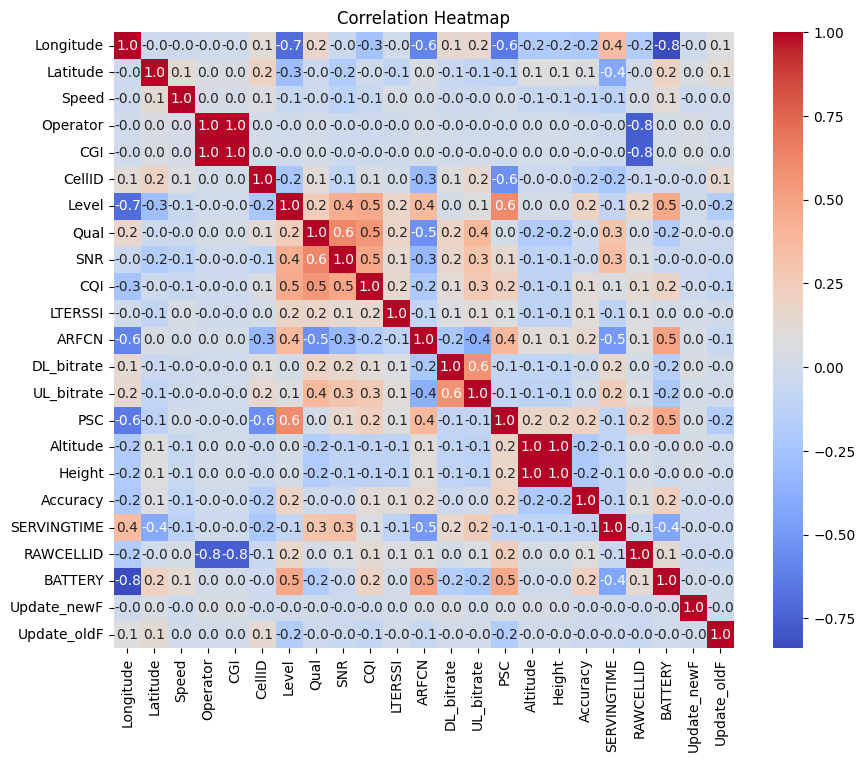

In [29]:
# Calculate correlation matrix
corr_matrix = df_num.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f", annot_kws={"size": 10})
plt.title("Correlation Heatmap")
plt.show()

# RANDOM FOREST REGRESSOR PREDICTION

In [31]:
# importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [32]:
# Split data into features (X) and target (y)
X = df_num.drop(["DL_bitrate"], axis = 1)
y = df_num["DL_bitrate"] # Target to be predicted

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Make Prediction
y_pred_rf_reg = rf_reg.predict(X_test)

In [33]:
# Test and calculate the evaluation metrics

# importing the required libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# print metrics
print("Random Forest Regression MSE:", mean_squared_error(y_test, y_pred_rf_reg))
print("Random Forest Regression RMSE:", mean_squared_error(y_test, y_pred_rf_reg, squared=False))
print("Random Forest Regression MAE:", mean_absolute_error(y_test, y_pred_rf_reg))
print("Random Forest Regression R2:", r2_score(y_test, y_pred_rf_reg))


Random Forest Regression MSE: 1060.3966105438403
Random Forest Regression RMSE: 32.56373152057117
Random Forest Regression MAE: 6.791531631520533
Random Forest Regression R2: 0.49596462981286704


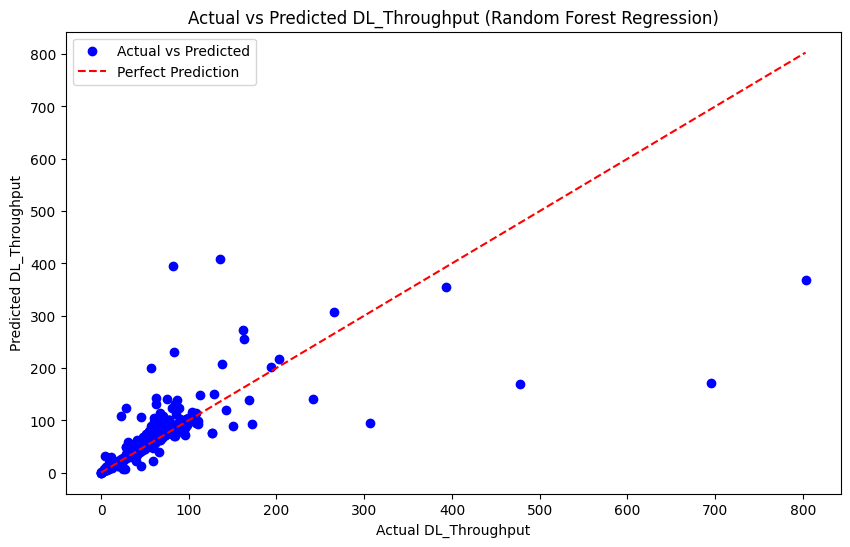

In [34]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_reg, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual DL_Throughput')
plt.ylabel('Predicted DL_Throughput')
plt.title('Actual vs Predicted DL_Throughput (Random Forest Regression)')
plt.legend()
plt.show()

# LINEAR REGRESSION PREDICTION

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
# Linear Regression Model

# Initialize and Train Linear Regressor
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make Prediction
y_pred_linear = linear_reg.predict(X_test)

In [38]:
# Test and calculate the evaluation metrics

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_linear, squared=False))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_linear))
print("Linear Regression R2:", r2_score(y_test, y_pred_linear))


Linear Regression MSE: 1341.6051607788793
Linear Regression RMSE: 36.62792869899797
Linear Regression MAE: 8.378722993722556
Linear Regression R2: 0.3622985521319775


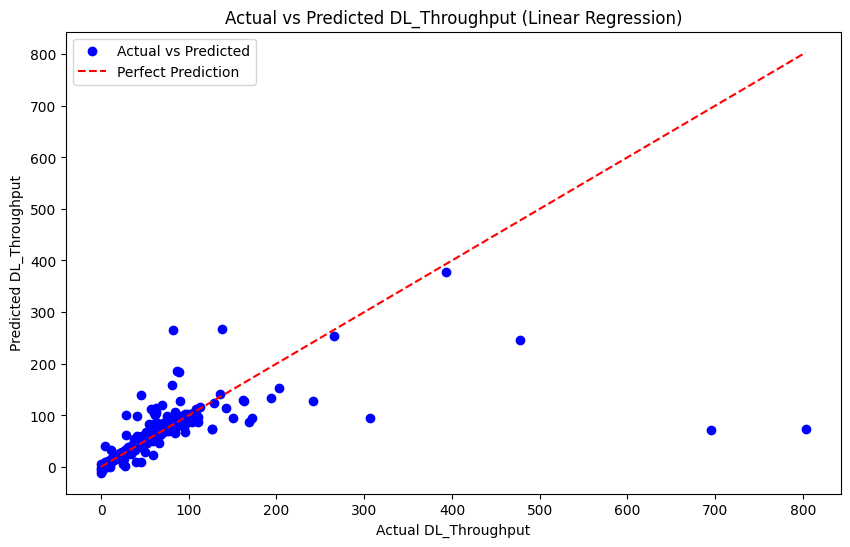

In [39]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual DL_Throughput')
plt.ylabel('Predicted DL_Throughput')
plt.title('Actual vs Predicted DL_Throughput (Linear Regression)')
plt.legend()
plt.show()

# GRADIENT BOOSTING REGRESSION PREDICTION

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
# Gradient Boosting (GB) Regression Model

# Initialize and Train GB Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_reg.predict(X_test)

In [43]:
# Test and calculate the evaluation metrics

print("Gradient Boosting Regression MSE:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting Regression RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("Gradient Boosting Regression MAE:", mean_absolute_error(y_test, y_pred_gb))
print("Gradient Boosting Regression R2:", r2_score(y_test, y_pred_gb))

Gradient Boosting Regression MSE: 1518.6524109452685
Gradient Boosting Regression RMSE: 38.96989108202983
Gradient Boosting Regression MAE: 7.742843027727472
Gradient Boosting Regression R2: 0.2781431753692559


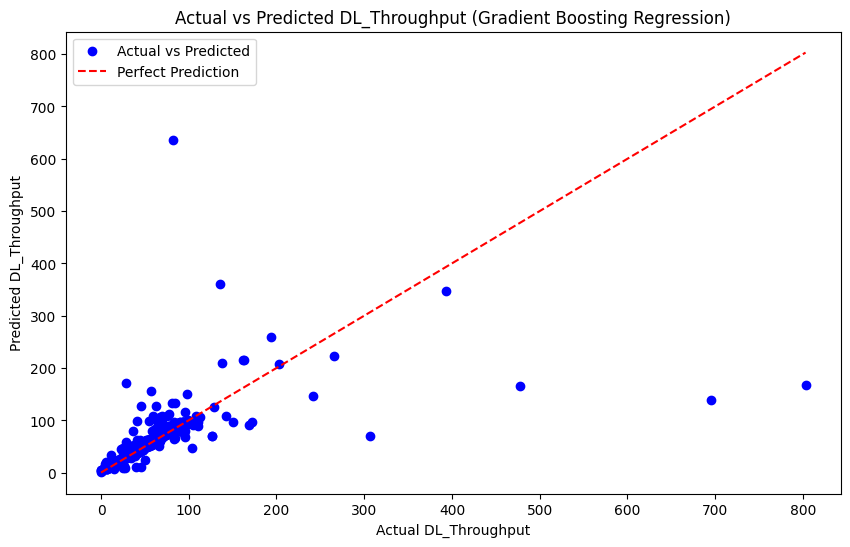

In [44]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual DL_Throughput')
plt.ylabel('Predicted DL_Throughput')
plt.title('Actual vs Predicted DL_Throughput (Gradient Boosting Regression)')
plt.legend()
plt.show()